<a href="https://colab.research.google.com/github/gachet/ad-1-24/blob/main/LOG/Outliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import modules**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pandas.plotting import scatter_matrix

**Import data**

In [ ]:
data = pd.read_csv('2.iris.csv')

**Distribution of variables**

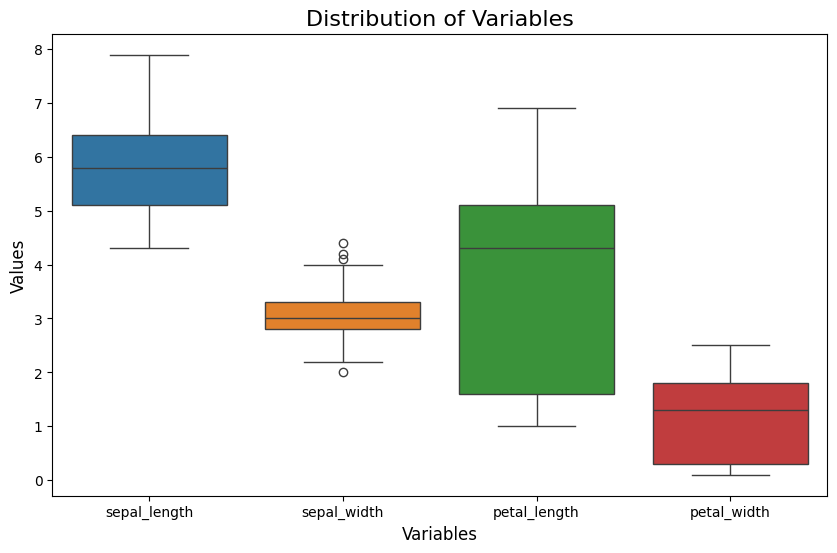

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[:][:-1])
plt.title('Distribution of Variables', fontsize=16)
plt.xlabel('Variables', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.show()

It seems that we have 3 outliers in the sepal_width column.
Let's see if the distribution is normal.

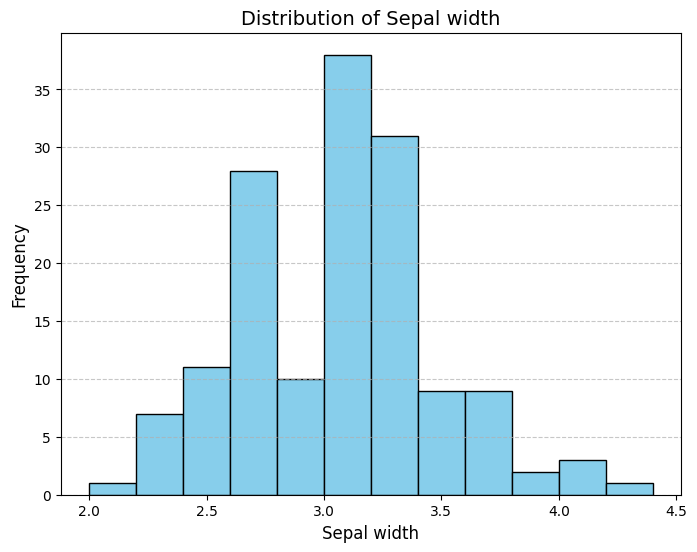

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(data['sepal_width'], bins=12, color='skyblue', edgecolor='black')
plt.title('Distribution of Sepal width', fontsize=14)
plt.xlabel('Sepal width', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Detect Outliers.** Since the distribution is not normal, we will use the median - IQR method for finding the

In [ ]:
Q1 = data['sepal_width'].quantile(0.25)
Q3 = data['sepal_width'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = data[(data['sepal_width'] < lower_bound) | (data['sepal_width'] > upper_bound)]

print("Outliers:")
print(outliers)


Outliers:
    sepal_length  sepal_width  petal_length  petal_width     species
15           5.7          4.4           1.5          0.4      setosa
32           5.2          4.1           1.5          0.1      setosa
33           5.5          4.2           1.4          0.2      setosa
60           5.0          2.0           3.5          1.0  versicolor


But that's not all. We have three classes. We should verify if dividing the data in these classes generates new ouliers.

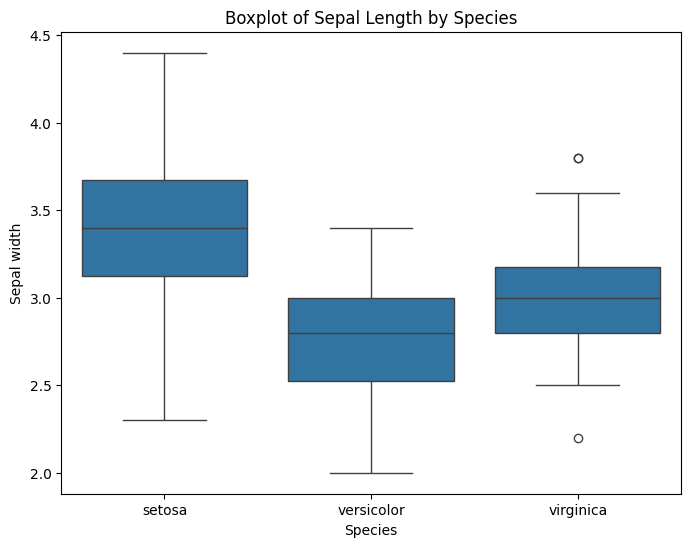

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='species', y='sepal_width')
plt.title('Boxplot of Sepal Length by Species')
plt.xlabel('Species')
plt.ylabel('Sepal width')
plt.show()

Mmm...it seems that the previous were not outliers. We just had to look better. The real outliers are these ones. Let's identify them (class virginica).

In [ ]:
virginica_data = data[data['species'] == 'virginica']

Q1 = virginica_data['sepal_width'].quantile(0.25)
Q3 = virginica_data['sepal_width'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

virginica_outliers = virginica_data[
    (virginica_data['sepal_width'] < lower_bound) |
    (virginica_data['sepal_width'] > upper_bound)
]

print("Outliers for Virginica:")
print(virginica_outliers)


Outliers for Virginica:
     sepal_length  sepal_width  petal_length  petal_width    species
117           7.7          3.8           6.7          2.2  virginica
119           6.0          2.2           5.0          1.5  virginica
131           7.9          3.8           6.4          2.0  virginica


**Please do the same for the other variables.**

We have checked inside each variable. What if we are missing something? What if we should consider the combination of more variables?

**Visualize the distribution of multiple variables**

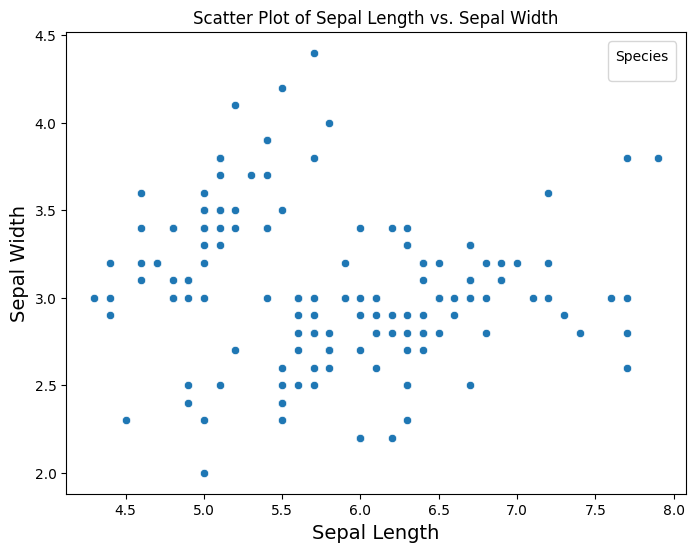

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='sepal_length', y='sepal_width')
plt.title('Scatter Plot of Sepal Length vs. Sepal Width')
plt.xlabel('Sepal Length',fontsize=14)
plt.ylabel('Sepal Width',fontsize=14)
plt.legend(title='Species',fontsize=14, loc='best')
plt.show()

**No outliers are evident. Please check for the other combinations of variables**